In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("311_data.csv")
df['Created Date'] = df['Created Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df = df[df["Closed Date"].notnull()]
df["Closed Date"] = df["Closed Date"].apply(lambda x:str(x))
df['Closed Date'] = df['Closed Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df["processing_time"] = df["Closed Date"] - df["Created Date"]
df["start_time_window"] = df["Created Date"].apply(lambda x:x.hour)

In [3]:
df['float_time'] =df['processing_time'].apply(lambda x:x/np.timedelta64(1, 'D'))

In [4]:
plt.gcf().subplots_adjust(bottom=0.15)
#Your code starts here
grouped = df[['float_time','start_time_window']].groupby('start_time_window')
grouped.mean().plot(kind='bar', figsize=(8,5.5))
plt.savefig("1.png",dpi=100)
plt.clf()

sns.boxplot(x=df["start_time_window"], y=df["float_time"])
plt.savefig("2.png",dpi=100)
plt.clf()

grouped = df[['float_time','Agency']].groupby('Agency')
grouped.mean().sort_values('float_time',ascending=False).plot(kind='bar', figsize=(8,5.5))
plt.savefig("3.png",dpi=100)
plt.clf()

agency_borough = df.groupby(['Agency', 'Borough'])['float_time'].agg('mean').unstack()
#We'll arrange the subplots in two rows and three columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (label, col) in enumerate(agency_borough.iteritems()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    col = col.sort_values(ascending=False)
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)

plt.tight_layout() 
plt.savefig("4.png",dpi=100)
plt.clf()


In [5]:
agency_borough = df.groupby(['Agency', 'Borough'])['float_time'].agg('mean').unstack()

In [6]:
agency_borough

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Agency,,,,,,
DEP,4.011111,19.220023,4.919618,12.348148,2.937847,NaN
DHS,0.000266,NaN,0.000463,NaN,NaN,NaN
DOB,NaN,3.965768,2.971794,0.000000,NaN,NaN
DOHMH,2.996586,3.292095,60.926354,NaN,NaN,NaN
DOT,1.707337,3.305910,1.760639,13.571032,NaN,16.644284
DPR,NaN,0.058727,NaN,NaN,NaN,NaN
DSNY,4.141667,1.186048,2.647569,0.903472,2.268750,NaN
FDNY,NaN,5.468623,NaN,NaN,NaN,NaN
HPD,7.797139,7.412919,6.889536,8.656059,5.701742,1.001412


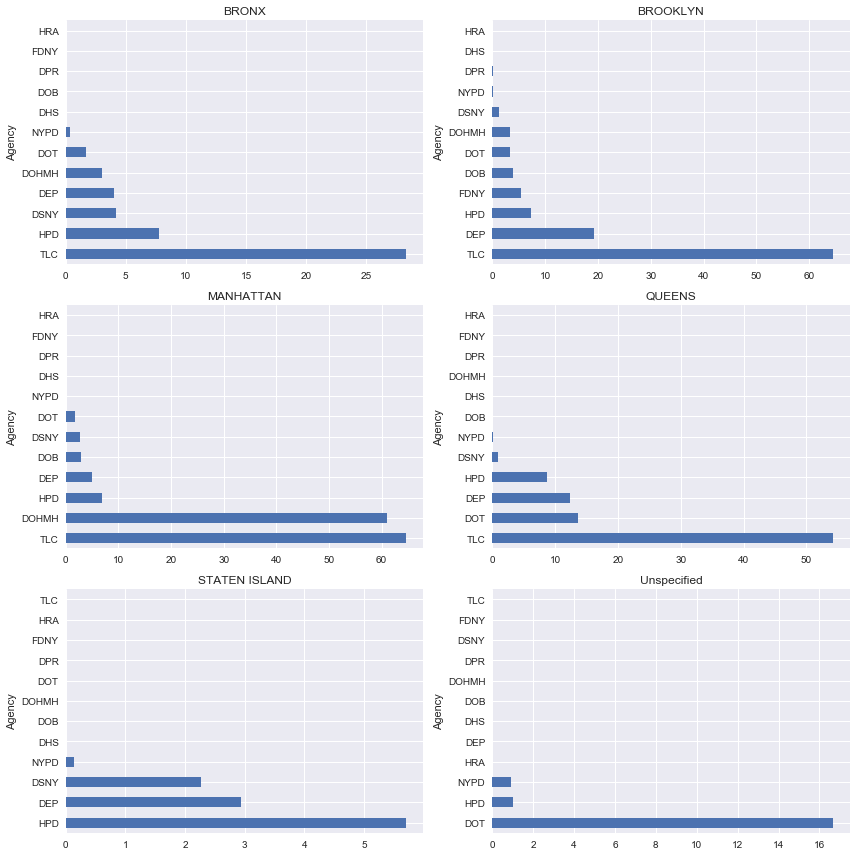

In [7]:
#We'll arrange the subplots in two rows and three columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 2
ROW_NUM = 3
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (label, col) in enumerate(agency_borough.iteritems()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    col = col.sort_values(ascending=False)
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)

plt.tight_layout() 